In [1]:
#import
import pandas as pd
import numpy as np
import hddm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import kabuki
sns.set(style="white")
%matplotlib inline
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

import pymc as pm
import arviz as az

/home/krishn/anaconda3/envs/hddm/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data = hddm.generate.gen_rl_data_MAB(0.4, num_trials=50, mu=[3.5,2], mu_sd=0.1)

data['rt'] = 0.5
data['subj_idx'] = 111
data['q_init'] = 0
data['split_by'] = 0

data.head()
# r0 = data['response'][data['response']==0]
# print(len(r0))

,trial,response,feedback,rt,subj_idx,q_init,split_by
0,0,1,1.880314,0.5,111,0,0
1,1,1,1.966865,0.5,111,0,0
2,2,0,3.428017,0.5,111,0,0
3,3,0,3.449601,0.5,111,0,0
4,4,1,2.074364,0.5,111,0,0


In [3]:
#run the model by calling hddm.Hrl (instead of hddm.HDDM for normal model and hddm.HDDMrl for rlddm-model)
m_rl = hddm.Hrl(data, params=['beta'])

#set sample and burn-in
m_rl.sample(500,burn=100,dbname='traces.db',db='pickle')
#print stats to get an overview of posterior distribution of estimated parameters
m_rl.print_stats()

 [-----------------100%-----------------] 500 of 500 complete in 3.1 sec          mean       std        2.5q        25q       50q       75q     97.5q      mc err
beta  0.188606  0.127382  0.00781769  0.0822951  0.171639  0.272369  0.477598  0.00752526
DIC: 70.333048
deviance: 69.896708
pD: 0.436340


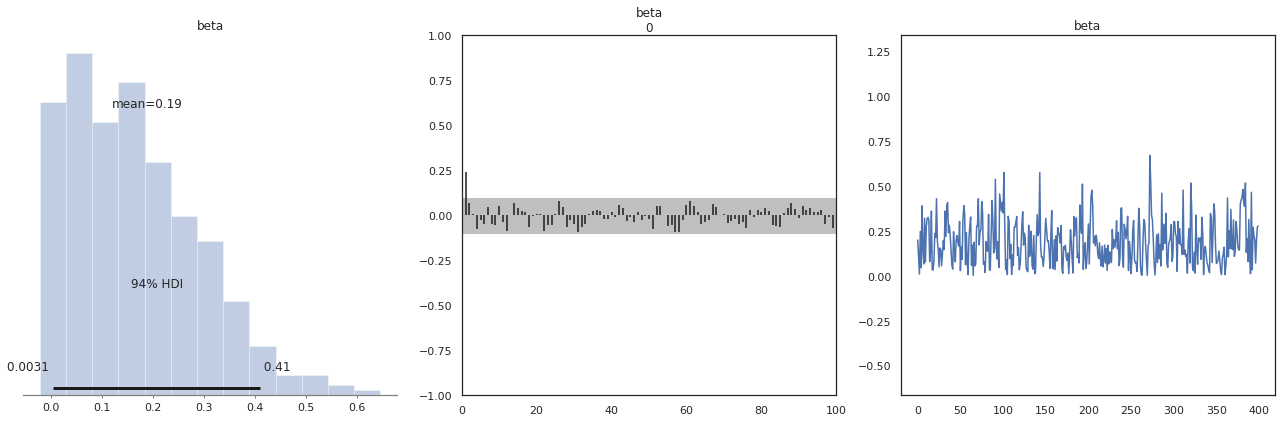

In [4]:
#m_rl.plot_posteriors()
m_rl.plot_posteriors()

In [5]:
# InfDataObj = hddm.utils.get_inference_data_object(m_rl)

# for param in InfDataObj.posterior:
#     fig, ax = plt.subplots(1,3)
#     fig.set_size_inches(18, 6)

#     az.plot_posterior(InfDataObj.posterior[param], kind='hist', ax=ax[0])
#     az.plot_autocorr(InfDataObj.posterior[param], ax=ax[1])
#     trace_samples = np.array(InfDataObj.posterior[param][0])
#     ax[2].plot(np.arange(len(trace_samples)), trace_samples)

#     trace_range = max(trace_samples), min(trace_samples)
#     min_range = min(trace_samples)
#     max_range = max(trace_samples)
#     tr_range = max_range-min_range
#     ax[2].set_ylim([min_range-1*tr_range, max_range+1*tr_range])
#     ax[2].title.set_text(param)

#     fig.tight_layout()
#     plt.show()

In [6]:
# obj = hddm.utils.get_inference_data_object(m_rl)
# az.plot_trace(obj)